## **Machine Learning Final Project DUE: Friday May 7th 11:59pm**

**Note: Please read all the instructions carefully before starting the project.**

For your final project you will build an ML model to analyze a dataset of your choice. You are welcome to keep working on the data in your EDA project if your data is large enough (at least 1000 rows for simple models and at least 10,000 for more complex models) or you can choose from the datasets/project suggestions below.

In this project make sure that you:
- Have a large enough dataset
- Split your data in training and testing
- Explore your data to inform which type of model to choose (no need if you are using your EDA dataset)
- Try different models on your training dataset - then select the most promising model
- Use cross validation to fine tune the model’s parameters such as alpha in lasso
- Simplify your model using regularization, prunnning, drop-out, etc. to avoid overfitting
- Communicate your model’s performance and make sure you compare it to a benchmark when appropriate
- Plot interesting graphs and results
- Write and publish your article to medium
- Commit your code to your GitHub

Please ensure you handle all the preprocessing before the modeling.

Suggestions for project:
You can take a look at the resources given below for choosing a dataset for your project. 

- Traffic sign detection - https://benchmark.ini.rub.de/gtsdb_dataset.html
- Cat and dog classifier - https://www.kaggle.com/c/dogs-vs-cats/data
- Other datasets from Kaggle - https://www.kaggle.com/data/41592

## **Grading Criteria**

- Show clear exploration of the data to justify model choice
- Train mutliple models and clearly articulate why you chose your final model
- Show your performance on test dataset
- Clear and concise write-up with clear well-documented figures
- Commit your code to GitHub

## **Submission Details**

This is an individual assignment. You may not work in groups. The assignment is due on Friday (05/07/2021)
- To submit your assignment, download your notebook and the dataset, zip the dataset and notebook, and submit the zipped file on blackboard.
- Make sure the notebook is named in the format - Final_LastName_FirstName. If you are submitting a zipped file, please name the file as well in the same format.
- Please include the link to access your blog and your github repo in your notebook.
- Also include the link to your notebook, github repo and the blog in the submission on blackboard. Please ensure the TAs have the required access to your notebooks and the github repo.

**Note - If the dataset is too large to be zipped and submitted on blackboard, only submit your notebook, add your dataset to your google drive and share a link to the file in your notebook.**

In [2]:
# Start solution here
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from yellowbrick.regressor import ResidualsPlot
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import plot_confusion_matrix
import  matplotlib.pyplot as plt


df = pd.read_csv('heart.csv')
df.head()

# I want to construct a model to predict likelihood of a heart attack in a patient
# Output (1 or 0) is the target variable
# Target is a binary type data, so probably will want something like a decision tree/logreg/ensemble

#Age : Age of the patient
#Sex : Sex of the patient
#exang: exercise induced angina (1 = yes; 0 = no)
#ca: number of major vessels (0-3)
#cp : Chest Pain type chest pain type
  #Value 1: typical angina
  #Value 2: atypical angina
  #Value 3: non-anginal pain
  #Value 4: asymptomatic
#trtbps : resting blood pressure (in mm Hg)
#chol : cholestoral in mg/dl fetched via BMI sensor
#fbs : (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
#rest_ecg : resting electrocardiographic results
  #Value 0: normal
  #Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
  #Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
#thalach : maximum heart rate achieved

#Output: (Target Variable) : 0= less chance of heart attack 1= more chance of heart attack


# Dataset: https://www.kaggle.com/rashikrahmanpritom/heart-attack-analysis-prediction-dataset



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
# find and drop null values 
print(df.isnull().sum())
#No null value

df.describe()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64


,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


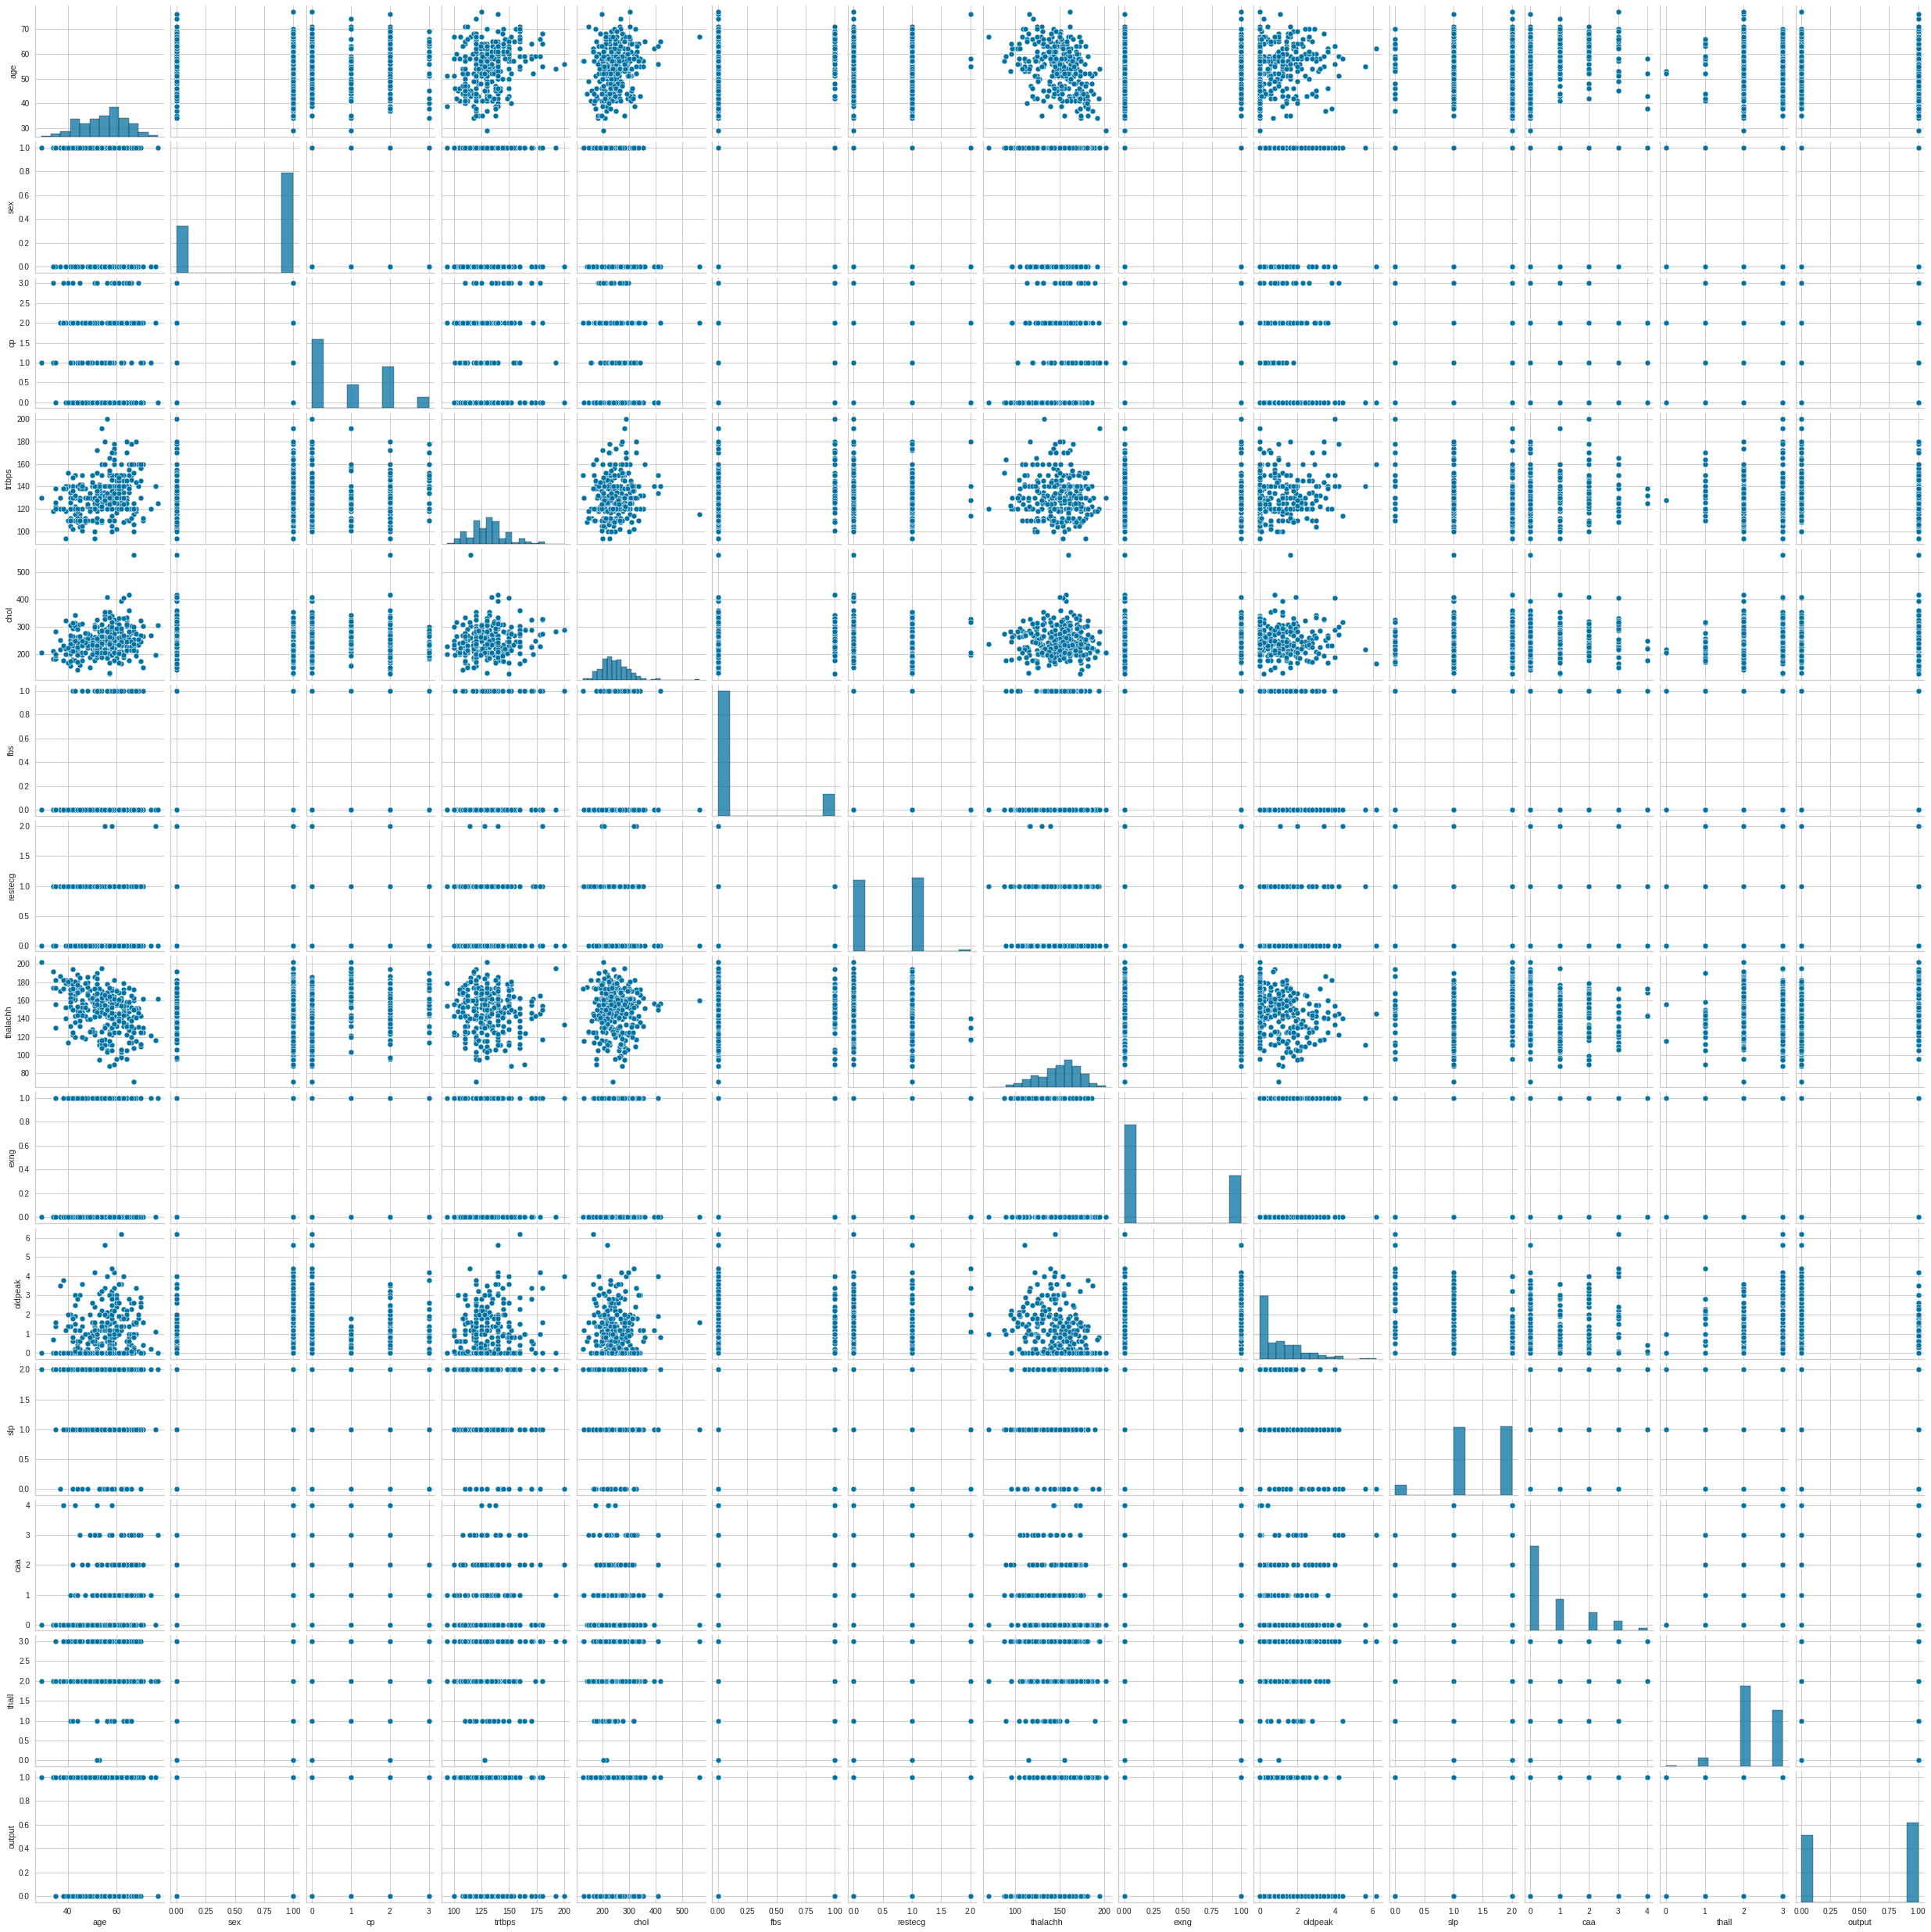

               age       sex        cp  ...       caa     thall    output
age       1.000000 -0.098447 -0.068653  ...  0.276326  0.068001 -0.225439
sex      -0.098447  1.000000 -0.049353  ...  0.118261  0.210041 -0.280937
cp       -0.068653 -0.049353  1.000000  ... -0.181053 -0.161736  0.433798
trtbps    0.279351 -0.056769  0.047608  ...  0.101389  0.062210 -0.144931
chol      0.213678 -0.197912 -0.076904  ...  0.070511  0.098803 -0.085239
fbs       0.121308  0.045032  0.094444  ...  0.137979 -0.032019 -0.028046
restecg  -0.116211 -0.058196  0.044421  ... -0.072042 -0.011981  0.137230
thalachh -0.398522 -0.044020  0.295762  ... -0.213177 -0.096439  0.421741
exng      0.096801  0.141664 -0.394280  ...  0.115739  0.206754 -0.436757
oldpeak   0.210013  0.096093 -0.149230  ...  0.222682  0.210244 -0.430696
slp      -0.168814 -0.030711  0.119717  ... -0.080155 -0.104764  0.345877
caa       0.276326  0.118261 -0.181053  ...  1.000000  0.151832 -0.391724
thall     0.068001  0.210041 -0.161736

In [17]:
# Lets see what traits are most correlated with stroke
sb.pairplot(data=df)
plt.show()

print(df.corr())

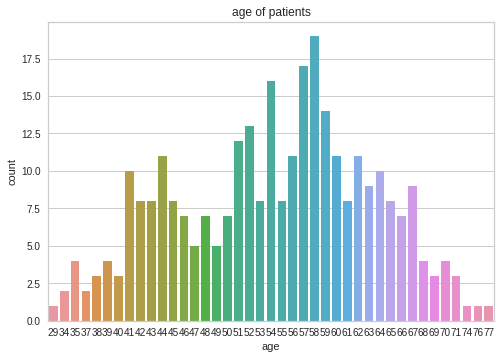

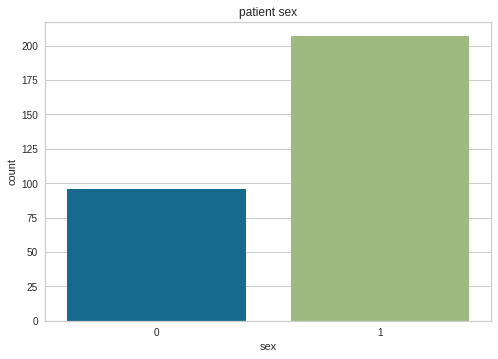

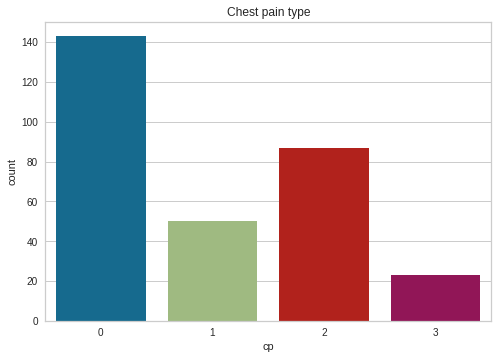

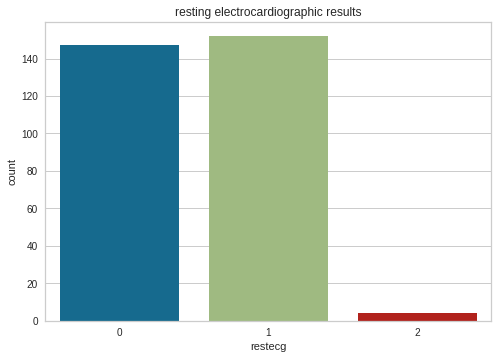

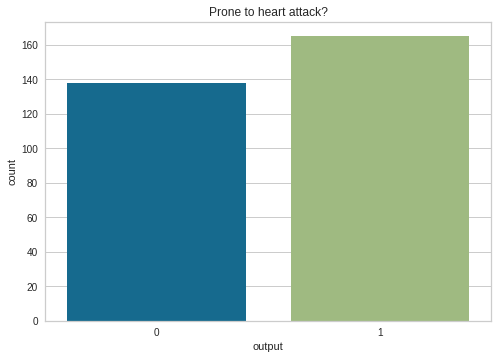

In [16]:
# Countplots
plt.figure(1)
sb.countplot(x="age", data=df)
plt.title("age of patients")
plt.figure(2)
sb.countplot(x="sex", data=df)
plt.title("patient sex")
plt.figure(3)
sb.countplot(x="cp", data=df)
plt.title("Chest pain type")
plt.figure(4)
sb.countplot(x="restecg", data=df)
plt.title("resting electrocardiographic results")
plt.figure(5)
sb.countplot(x="output", data=df)
plt.title("Prone to heart attack?")

plt.show()

In [7]:
# Compute baseline accuracy
# Training/testing set
X = df.drop(['output'], axis=1)
y = df['output']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=2020)

from sklearn.dummy import DummyClassifier
dummy_classifier = DummyClassifier(strategy='most_frequent')
dummy_classifier.fit(X_train, y_train)
baseline = dummy_classifier.score(X_test, y_test)


### For verifying answer:
print("Baseline Accuracy:", baseline)

Baseline Accuracy: 0.5274725274725275


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[[32 11]
 [ 6 42]]
Model Accuracy: 0.8131868131868132


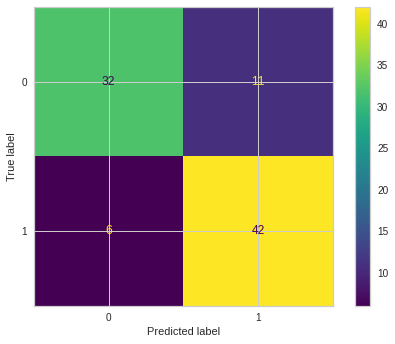

              precision    recall  f1-score   support

           0       0.84      0.74      0.79        43
           1       0.79      0.88      0.83        48

    accuracy                           0.81        91
   macro avg       0.82      0.81      0.81        91
weighted avg       0.82      0.81      0.81        91



In [8]:

# Logistic Regression Model:
LogReg = LogisticRegression()
LogReg.fit(X_train, y_train)
y_pred = LogReg.predict(X_test)


cnf_matrix = metrics.confusion_matrix(y_test,y_pred)
print(cnf_matrix)
print("Model Accuracy:",metrics.accuracy_score( y_test,y_pred))

plot_confusion_matrix(LogReg, X_test,y_test)
plt.show()

print(metrics.classification_report(y_test, y_pred))


In [9]:
# Regularization with Lasso: 
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge

alpha_user = 0.0024420530945486497
lasso_model = Lasso(alpha=alpha_user,normalize=True)
lasso_model.fit(X_train,y_train)
lasso_coef = lasso_model.coef_

In [10]:
from sklearn.model_selection import cross_val_score
alpha_space = np.logspace(-4, 0, 50)
print(alpha_space)
model_scores = []

lasso_model = Lasso(normalize=True) #same for Ridge
for alpha in alpha_space:

    # Specify the alpha value to use
    lasso_model.alpha = alpha
    
    # Perform 10-fold CV
    lasso_cv_scores = cross_val_score(lasso_model,X_train,y_train,cv=10)
    
    # Append the mean of lasso_cv_scores to model_scores = []
    model_scores.append(np.mean(lasso_cv_scores))
  
best_alpha_index = np.argmax(model_scores)
print(np.max(model_scores))
print(alpha_space[best_alpha_index])

[1.00000000e-04 1.20679264e-04 1.45634848e-04 1.75751062e-04
 2.12095089e-04 2.55954792e-04 3.08884360e-04 3.72759372e-04
 4.49843267e-04 5.42867544e-04 6.55128557e-04 7.90604321e-04
 9.54095476e-04 1.15139540e-03 1.38949549e-03 1.67683294e-03
 2.02358965e-03 2.44205309e-03 2.94705170e-03 3.55648031e-03
 4.29193426e-03 5.17947468e-03 6.25055193e-03 7.54312006e-03
 9.10298178e-03 1.09854114e-02 1.32571137e-02 1.59985872e-02
 1.93069773e-02 2.32995181e-02 2.81176870e-02 3.39322177e-02
 4.09491506e-02 4.94171336e-02 5.96362332e-02 7.19685673e-02
 8.68511374e-02 1.04811313e-01 1.26485522e-01 1.52641797e-01
 1.84206997e-01 2.22299648e-01 2.68269580e-01 3.23745754e-01
 3.90693994e-01 4.71486636e-01 5.68986603e-01 6.86648845e-01
 8.28642773e-01 1.00000000e+00]
0.44996338795258906
0.0013894954943731374


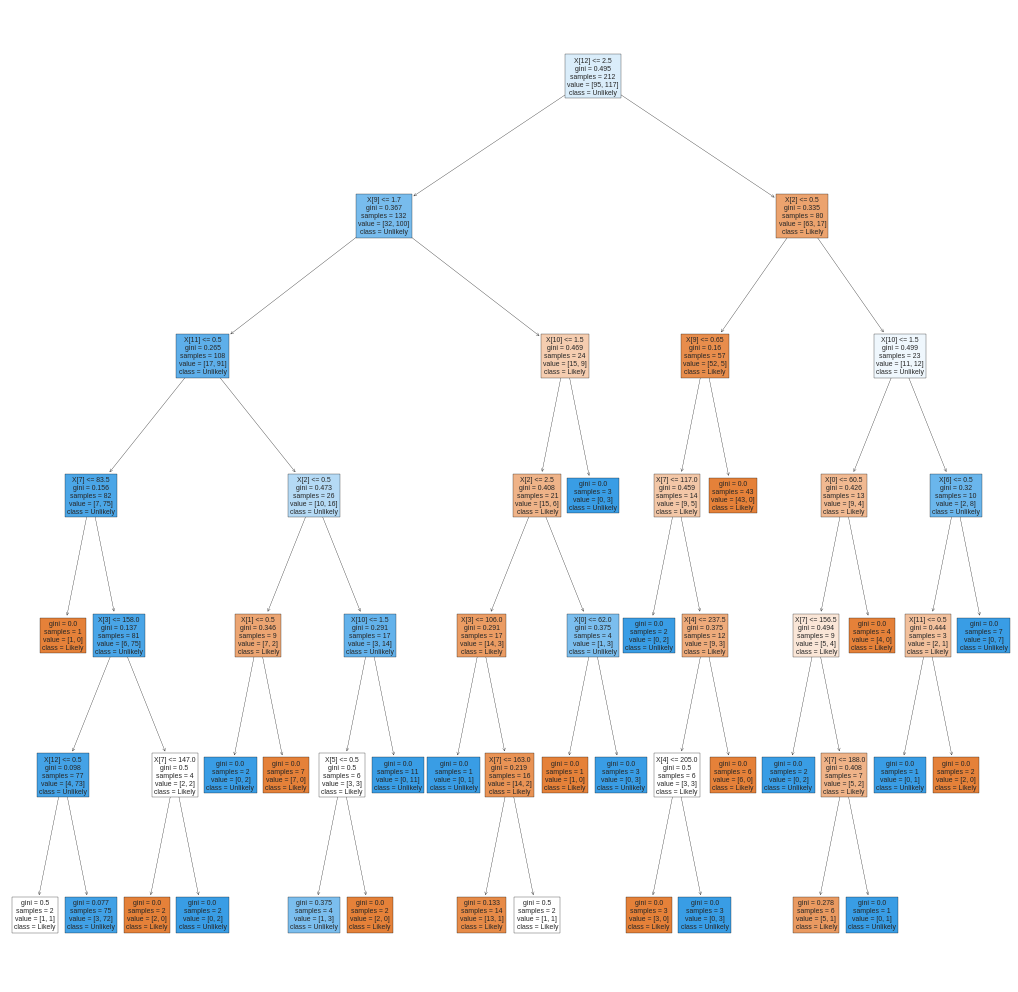

In [15]:
# Let's try a decision tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score
import numpy as np
from sklearn import tree

# Lets try dropping some attributes to avoid overfitting. 
# 
##X = data2.drop(['stroke', 'id', 'hypertension', 'smoking_status_Unknown'], axis=1)
# 'hypertension', 'smoking_status_Unknown'
#y = data2['stroke']
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=2020)


Tree = DecisionTreeClassifier(max_depth=6, criterion="gini", random_state=2020)
Tree.fit(X_train,y_train)
ypred = Tree.predict((X_test))

fn = X.columns
cn = y.unique()
plt.figure(figsize = (18, 18))
HeartDecisionTree = tree.plot_tree(Tree, class_names=['Likely', 'Unlikely'], filled = True)
plt.savefig('StrokeDT.png')
plt.show()

In [18]:
training_pred = Tree.predict(X_train)
acc_training = accuracy_score(training_pred, y_train)
print("Training Accuracy:", acc_training)

ypred = Tree.predict((X_test))
acc_testing = accuracy_score(ypred, y_test)
print("Testing Accuracy: ", acc_testing)

Training Accuracy: 0.9622641509433962
Testing Accuracy:  0.7692307692307693


In [34]:
#What are the most significant features? 
importance=pd.DataFrame(zip(X_train.columns, Tree.feature_importances_))
importance.nlargest(5, 1)


,0,1
12,thall,0.330417
2,cp,0.136407
9,oldpeak,0.122519
7,thalachh,0.098213
10,slp,0.079930


[[30 13]
 [ 8 40]]
Accuracy: 0.7692307692307693


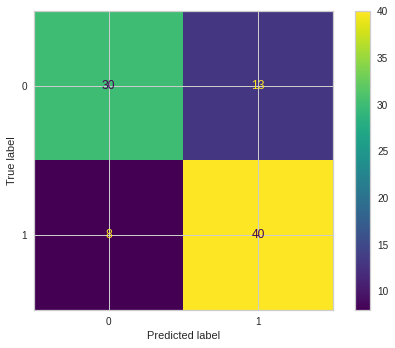

In [20]:
confusionMatrix = metrics.confusion_matrix(y_test, ypred)
print(confusionMatrix)
print('Accuracy:', metrics.accuracy_score(y_test, ypred))
metrics.plot_confusion_matrix(Tree, X_test, y_test)
plt.show()

In [21]:
columns = list(df)
print(columns)

['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh', 'exng', 'oldpeak', 'slp', 'caa', 'thall', 'output']


In [23]:
# Try ensemble methods
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn import model_selection
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, VotingClassifier

# Normalizing the data
values = df.values
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputedData = imputer.fit_transform(values)
scaler = MinMaxScaler(feature_range=(0, 1))
normalizedData = scaler.fit_transform(imputedData)
cols = columns
normalizedData = pd.DataFrame(normalizedData, columns=cols)
print(normalizedData.head())

        age  sex        cp    trtbps  ...  slp  caa     thall  output
0  0.708333  1.0  1.000000  0.481132  ...  0.0  0.0  0.333333     1.0
1  0.166667  1.0  0.666667  0.339623  ...  0.0  0.0  0.666667     1.0
2  0.250000  0.0  0.333333  0.339623  ...  1.0  0.0  0.666667     1.0
3  0.562500  1.0  0.333333  0.245283  ...  1.0  0.0  0.666667     1.0
4  0.583333  0.0  0.000000  0.245283  ...  1.0  0.0  0.666667     1.0

[5 rows x 14 columns]


In [33]:
# Determine baseline accuracy
X2 = normalizedData.drop(['output'], axis=1)
y2 = normalizedData['output']
X_train, X_test, y_train, y_test = train_test_split(X2, y2, test_size=0.3, random_state=42)
dummy_classifier = DummyClassifier(strategy='most_frequent')
dummy_classifier.fit(X_train,y_train)
baseline = dummy_classifier.score(X_test,y_test)

print("Baseline Accuracy:", baseline)

Baseline Accuracy: 0.5494505494505495


In [31]:
# Random Forest
randomForest = RandomForestClassifier(n_estimators=100, max_features=7, random_state=42)
randomForest.fit(X_train, y_train)
predictRandomForest = randomForest.predict(X_test)
print(accuracy_score(y_test, predictRandomForest))

0.8241758241758241


In [29]:
# Boosting
from sklearn.ensemble import AdaBoostClassifier
base = DecisionTreeClassifier(max_depth=6)
adaboost = AdaBoostClassifier(base, n_estimators=200, random_state=42, learning_rate=.05)
adaboost.fit(X_train, y_train)
print(accuracy_score(y_test, adaboost.predict(X_test)))


0.7142857142857143


In [32]:
# Voting Classifer
from sklearn.svm import SVC
rfClf = RandomForestClassifier(n_estimators=200) 
svmClf = SVC(probability=True) 
logClf = LogisticRegression()
dtClf = DecisionTreeClassifier(max_depth=4)
vclassifier = VotingClassifier(estimators = [('rf',rfClf), ('svm',svmClf), ('log', logClf), ('dtClf', dtClf)], voting='soft') 
vclassifier.fit(X_train, y_train)
predvclassifier = vclassifier.predict(X_test)

print('Accuracy score', accuracy_score(y_test, predvclassifier))

Accuracy score 0.8351648351648352
